In [1]:
import pandas as pd
from matplotlib import pyplot as plt

<Axes: >

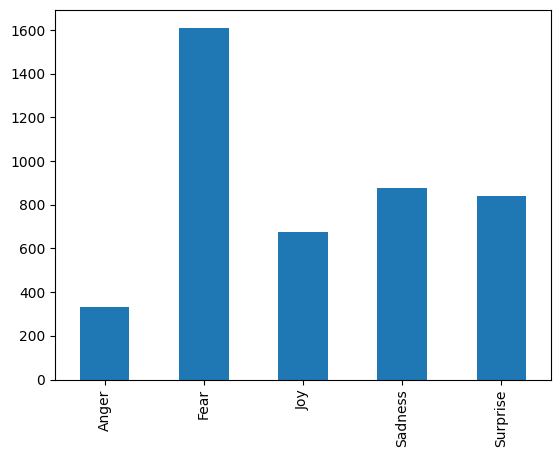

In [2]:
# plotting distribution of the provided dataset for comparison

train = pd.read_csv("original_datasets/eng.csv")
train[["Anger", "Fear", "Joy", "Sadness", "Surprise"]].sum().plot.bar()

In [ ]:
all_emotions = ["Anger","Disgust","Fear","Joy","Sadness","Surprise"]

def get_overlaps(df):

    emotions = [em for em in all_emotions if em in df.columns]

    overlaps = {}

    for em1 in emotions:
        counts = []

        for em2 in emotions:
            counts += [len(df[(df[em1] == 1) & (df[em2] == 1)])]

        overlaps[em1] = counts

    return pd.DataFrame(overlaps, index=emotions)

In [28]:
get_overlaps(train)

,Anger,Fear,Joy,Sadness,Surprise
Anger,333,239,7,154,112
Fear,239,1611,104,682,585
Joy,7,104,674,47,157
Sadness,154,682,47,878,200
Surprise,112,585,157,200,839


In [49]:
# SemEval 2018 data
# test set doesn't include labels, combining dev and train sets

dfs = [pd.read_csv(f"original_datasets/2018-E-c-En-{x}.txt", sep="\t") for x in ["dev", "train"]]
 
semeval = pd.concat(dfs)
semeval.reset_index(inplace=True, drop=True)
semeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7724 entries, 0 to 7723
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            7724 non-null   object
 1   Tweet         7724 non-null   object
 2   anger         7724 non-null   int64 
 3   anticipation  7724 non-null   int64 
 4   disgust       7724 non-null   int64 
 5   fear          7724 non-null   int64 
 6   joy           7724 non-null   int64 
 7   love          7724 non-null   int64 
 8   optimism      7724 non-null   int64 
 9   pessimism     7724 non-null   int64 
 10  sadness       7724 non-null   int64 
 11  surprise      7724 non-null   int64 
 12  trust         7724 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 784.6+ KB


In [50]:
semeval = semeval.drop(["anticipation", "love", "optimism", "pessimism", "trust"], axis=1)
column_mapping = dict([(em.lower(), em) for em in all_emotions])
column_mapping["ID"] = "id"
column_mapping["Tweet"] = "text"
semeval = semeval.rename(columns=column_mapping)
semeval

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,2018-En-00866,"@RanaAyyub @rajnathsingh Oh, hidden revenge an...",1,1,0,0,0,0
1,2018-En-02590,I'm doing all this to make sure you smiling do...,0,0,0,1,0,0
2,2018-En-03361,if not then #teamchristine bc all tana has don...,1,1,0,0,0,0
3,2018-En-03230,It is a #great start for #beginners to jump in...,0,0,0,1,0,0
4,2018-En-01143,My best friends driving for the first time wit...,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
7719,2017-En-21383,@nicky57672 Hi! We are working towards your hi...,0,0,0,0,0,0
7720,2017-En-41441,@andreamitchell said @berniesanders not only d...,0,0,0,0,0,1
7721,2017-En-10886,@isthataspider @dhodgs i will fight this guy! ...,1,1,0,0,0,0
7722,2017-En-40662,i wonder how a guy can broke his penis while h...,0,0,0,0,0,1


<Axes: >

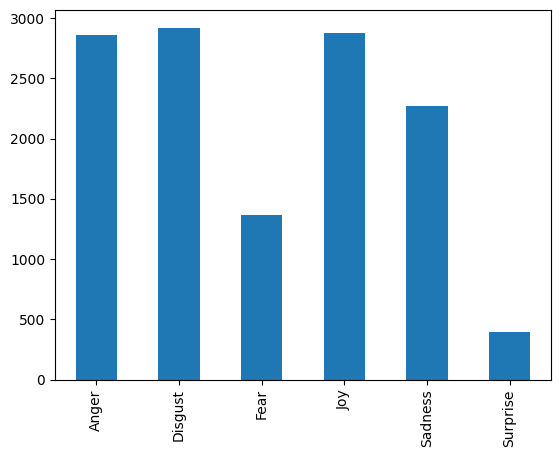

In [37]:
semeval[all_emotions].sum().plot.bar()

In [38]:
get_overlaps(semeval)

,Anger,Disgust,Fear,Joy,Sadness,Surprise
Anger,2859,2320,442,251,988,101
Disgust,2320,2921,524,243,1139,105
Fear,442,524,1363,169,482,59
Joy,251,243,169,2877,281,179
Sadness,988,1139,482,281,2273,77
Surprise,101,105,59,179,77,396


In [39]:
# since these are tweets, most of them contain @s and hashtags
# should deal with this in the preprocessing pipeline, i.e. split hashtags, replace usernames with [user] or similar
# top-performing team in 2018 used https://github.com/cbaziotis/ekphrasis

semeval[semeval["text"].str.contains("@")|semeval["text"].str.contains("#")]

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,2018-En-00866,"@RanaAyyub @rajnathsingh Oh, hidden revenge an...",1,1,0,0,0,0
2,2018-En-03361,if not then #teamchristine bc all tana has don...,1,1,0,0,0,0
3,2018-En-03230,It is a #great start for #beginners to jump in...,0,0,0,1,0,0
4,2018-En-01143,My best friends driving for the first time wit...,0,0,1,0,0,0
5,2018-En-04301,Hey @SuperValuIRL #Fields in #skibbereen give ...,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
7718,2017-En-20718,You have a #problem? Yes! Can you do #somethin...,1,1,0,0,0,0
7719,2017-En-21383,@nicky57672 Hi! We are working towards your hi...,0,0,0,0,0,0
7720,2017-En-41441,@andreamitchell said @berniesanders not only d...,0,0,0,0,0,1
7721,2017-En-10886,@isthataspider @dhodgs i will fight this guy! ...,1,1,0,0,0,0


In [13]:
# example from the ekphrasis github

from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=True,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=False).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

sentences = [
    "CANT WAIT for the new season of #TwinPeaks ＼(^o^)／!!! #davidlynch #tvseries :)))",
    "I saw the new #johndoe movie and it suuuuucks!!! WAISTED $10... #badmovies :/",
    "@SentimentSymp:  can't wait for the Nov 9 #Sentiment talks!  YAAAAAAY !!! :-D http://sentimentsymposium.com/."
]

for s in sentences:
    print(" ".join(text_processor.pre_process_doc(s)))

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...
<allcaps> CANT WAIT </allcaps> for the new season of <hashtag> Twin Peaks </hashtag> ＼(^o^)／ ! <repeated> <hashtag> david lynch </hashtag> <hashtag> tv series </hashtag> <happy>
I saw the new <hashtag> john doe </hashtag> movie and it sucks <elongated> ! <repeated> <allcaps> WAISTED </allcaps> <money> . <repeated> <hashtag> bad movies </hashtag> <annoyed>
<user> : can not wait for the <date> <hashtag> Sentiment </hashtag> talks ! <allcaps> DAY <elongated> </allcaps> ! <repeated> <laugh> <url>


In [55]:
# CBET dataset (another dataset of tweets, hashtag-based labelling)

cbet = pd.read_csv("original_datasets/CBET.csv")
cbet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            81163 non-null  object 
 1   text          81163 non-null  object 
 2   anger         81163 non-null  float64
 3   fear          81163 non-null  float64
 4   joy           81163 non-null  float64
 5   love          81163 non-null  float64
 6   sadness       81163 non-null  float64
 7   surprise      81163 non-null  float64
 8   thankfulness  81163 non-null  float64
 9   disgust       81163 non-null  float64
 10  guilt         81163 non-null  float64
dtypes: float64(9), object(2)
memory usage: 6.8+ MB


In [56]:
cbet = cbet.drop(["love","thankfulness","guilt"], axis=1)
cbet = cbet.rename(columns=column_mapping)
cbet = cbet.astype(dict(zip(all_emotions, ['int']*6)))
cbet

,id,text,Anger,Fear,Joy,Sadness,Surprise,Disgust
0,s_1,In hours i have to drive to applegate four hou...,1,0,0,0,0,0
1,s_2,When there s no more seats available in a rest...,1,0,0,0,0,0
2,s_3,PTGforza when people copy your hard earned wor...,1,0,0,0,0,0
3,s_4,I was just researching that online THIS IS WRO...,1,0,0,0,0,0
4,s_5,photo Angry #Headmaster milton grimm #MiltonGr...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
81158,d_4299,Lol ? #antisocial most men irritate me #mostme...,0,0,0,0,0,0
81159,d_4300,Be thankful ! god is good #godisgood self ie #...,0,0,0,0,0,0
81160,d_4301,When your dog humps your leg for treats empty ...,0,0,0,0,0,0
81161,d_4302,ok i think ill give up this live streaming tv ...,0,0,0,1,0,0


In [60]:
# lots of texts that are not labelled as any of the emotions we're looking for
# still usable but good to know

cbet[(cbet != 1).all(axis=1)]

,id,text,Anger,Fear,Joy,Sadness,Surprise,Disgust
25620,s_25621,Siguiente estación #NYC #newyork newyork city ...,0,0,0,0,0,0
25621,s_25622,romance #romance #hot porn #porn #sex #Cumshot...,0,0,0,0,0,0
25622,s_25623,#tbt to my brother s wedding with my best frie...,0,0,0,0,0,0
25623,s_25624,CrowdKind Service is love in work clothes #Kin...,0,0,0,0,0,0
25624,s_25625,In the moonlight wandering where you are Is my...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
81157,d_4298,#deep hopeless romantic #hopelessromantic #bel...,0,0,0,0,0,0
81158,d_4299,Lol ? #antisocial most men irritate me #mostme...,0,0,0,0,0,0
81159,d_4300,Be thankful ! god is good #godisgood self ie #...,0,0,0,0,0,0
81160,d_4301,When your dog humps your leg for treats empty ...,0,0,0,0,0,0


<Axes: >

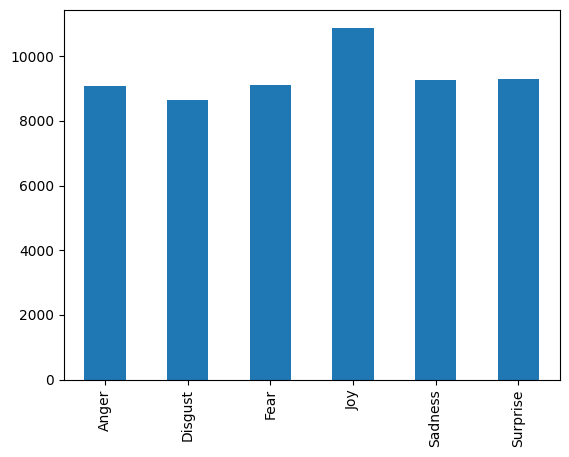

In [75]:
cbet[all_emotions].sum().plot.bar()

In [62]:
# way less overlap between labels than semeval 2018/2025
# might indicate that the hashtag-based labelling is stricter

get_overlaps(cbet)

,Anger,Disgust,Fear,Joy,Sadness,Surprise
Anger,9073,17,80,61,218,2
Disgust,17,8647,4,2,69,0
Fear,80,4,9110,17,7,1
Joy,61,2,17,10889,177,277
Sadness,218,69,7,177,9275,7
Surprise,2,0,1,277,7,9287


In [81]:
# Universal Joy - huge FB dataset, hashtag-labelled
# problem: each post classified as one emotion!

universal_joy = pd.read_csv("original_datasets/universal_joy/eng.csv")
universal_joy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282313 entries, 0 to 282312
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      282313 non-null  object
 1   emotion   282313 non-null  object
 2   language  282313 non-null  object
dtypes: object(3)
memory usage: 6.5+ MB


In [82]:
universal_joy.emotion.unique()

array(['joy', 'anticipation', 'fear', 'anger', 'sadness'], dtype=object)

In [83]:
# remove anticipation & separate emotion columns

universal_joy = universal_joy[universal_joy["emotion"] != "anticipation"]

for emotion in universal_joy.emotion.unique():
    universal_joy[emotion] = (universal_joy["emotion"] == emotion).astype('int')

universal_joy = universal_joy.drop(["emotion", "language"], axis=1)
universal_joy = universal_joy.rename(columns=column_mapping)
universal_joy

,text,Joy,Fear,Anger,Sadness
0,"[PERSON] , is one of my favorite people. [PHOT...",1,0,0,0
4,So super proud of my mom [PERSON] I could scre...,1,0,0,0
5,been on 00 trips in 0.0 years. This guy is the...,1,0,0,0
7,Art [WITH],1,0,0,0
10,[PERSON] ! And CALBAYOGNON please always liste...,0,1,0,0
...,...,...,...,...,...
282305,[PHOTO] Riding This. [WITH].,1,0,0,0
282307,My [PERSON] did it. [PHOTO] Finished. Master's...,1,0,0,0
282309,[PHOTO] NEW Ink I just got today. Done by my e...,1,0,0,0
282311,[PHOTO] THIS FRIDAY 00.00.000 (Rome,1,0,0,0


In [ ]:
# this dataset is anonymised as follows:

# Finally, we perform some additional pre-
# processing steps to replace any number with 0,
# and the Facebook-specific tags “with [PERSON]”
# with the special token [WITH], “at [LOCATION]”
# 1https://github.com/saffsd/langid.py
# 2https://github.com/google/cld3
# 3https://fasttext.cc/docs/en/
# language-identification.html (Joulin et al.,
# 2016b,a)
# 4Here and in what follows, we use standard ISO language
# codes, which are given in table 1.
# 5https://spacy.io
# with the special token [LOCATION], and pho-
# tos, emails, and URLs with the special tokens
# [PHOTO], [EMAIL], and [URL], respectively.

# if we use this dataset, need to make sure to use the same tokens if we anonymise other datasets ourselves

<Axes: >

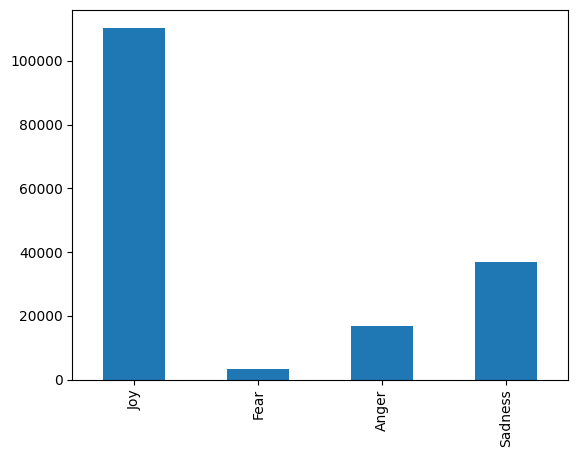

In [84]:
# suuuper imbalanced

universal_joy[["Joy","Fear","Anger","Sadness"]].sum().plot.bar()

In [ ]:
universal_joy["Disgust"] = pd.NA
universal_joy["Surprise"] = pd.NA
universal_joy["id"] = [f"uj{i}" for i in range(len(universal_joy))]
universal_joy.to_csv("universal_joy", index=False)

In [106]:
# ISEAR dataset, self-reported emotions (participants wrote about situations where they had experienced an emotion)
# one label per text

isear = pd.read_csv("original_datasets/isear.csv", sep="|", quotechar='"', on_bad_lines="skip")
isear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           7503 non-null   int64  
 1   CITY         7503 non-null   int64  
 2   COUN         7503 non-null   int64  
 3   SUBJ         7503 non-null   int64  
 4   SEX          7503 non-null   int64  
 5   AGE          7503 non-null   int64  
 6   RELI         7503 non-null   int64  
 7   PRAC         7503 non-null   int64  
 8   FOCC         7503 non-null   int64  
 9   MOCC         7503 non-null   int64  
 10  FIEL         7503 non-null   int64  
 11  EMOT         7503 non-null   int64  
 12  WHEN         7503 non-null   int64  
 13  LONG         7503 non-null   int64  
 14  INTS         7503 non-null   int64  
 15  ERGO         7503 non-null   int64  
 16  TROPHO       7503 non-null   int64  
 17  TEMPER       7503 non-null   int64  
 18  EXPRES       7503 non-null   int64  
 19  MOVE  

In [107]:
isear = isear.drop(['CITY', 'COUN', 'SUBJ', 'SEX', 'AGE', 'RELI', 'PRAC', 'FOCC',
       'MOCC', 'FIEL', 'EMOT', 'WHEN', 'LONG', 'INTS', 'ERGO', 'TROPHO',
       'TEMPER', 'EXPRES', 'MOVE', 'EXP1', 'EXP2', 'EXP10', 'PARAL', 'CON',
       'EXPC', 'PLEA', 'PLAN', 'FAIR', 'CAUS', 'COPING', 'MORL', 'SELF',
       'RELA', 'VERBAL', 'NEUTRO', 'Field3', 'Field2', 'MYKEY', 'STATE', 'Unnamed: 42'], axis=1)
isear.Field1.unique()

array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt'],
      dtype=object)

In [108]:
# separate relevant emotion columns

isear = isear[isear["Field1"].isin(["joy", "fear", "anger", "sadness", "disgust"])].copy()

for emotion in isear.Field1.unique():
    isear[emotion] = (isear["Field1"] == emotion).astype('int')

isear = isear.drop(["Field1"], axis=1)
isear

,ID,SIT,joy,fear,anger,sadness,disgust
0,11001,"During the period of falling in love, each tim...",1,0,0,0,0
1,11001,When I was involved in a traffic accident.,0,1,0,0,0
2,11001,When I was driving home after several days of...,0,0,1,0,0
3,11001,When I lost the person who meant the most to me.,0,0,0,1,0
4,11001,The time I knocked a deer down - the sight of ...,0,0,0,0,1
...,...,...,...,...,...,...,...
7496,331062,I received a letter from a distant friend.,1,0,0,0,0
7497,331062,My parents were out and I was the eldest at ho...,0,1,0,0,0
7498,331062,Two years back someone invited me to be the tu...,0,0,1,0,0
7499,331062,I had taken the responsibility to do something...,0,0,0,1,0


In [109]:
column_mapping["SIT"] = "text"
isear = isear.rename(columns=column_mapping)

In [110]:
# lot of 'á' characters in the texts - do these mean something special? they seem like a mistake so i remove them

isear[:20].text.to_list()

['During the period of falling in love, each time that we met and á especially when we had not met for a long time.',
 'When I was involved in a traffic accident.',
 'When I was driving home after  several days of hard work, there á was a motorist ahead of me who was driving at 50 km/hour and á refused, despite his low speeed to let me overtake.',
 'When I lost the person who meant the most to me. ',
 "The time I knocked a deer down - the sight of the animal's á injuries and helplessness.  The realization that the animal was á so badly hurt that it had to be put down, and when the animal á screamed at the moment of death.",
 'When I got a letter offering me the Summer job that I had applied á for.  ',
 'When I was going home alone one night in Paris and a man came up á behind me and asked me if I was not afraid to be out alone so á late at night.',
 'When I was talking to HIM at a party for the first time in a long while and a friend came and interrupted us and HE left.',
 "When my fri

In [111]:
isear["text"] = isear["text"].str.replace('á', '')

<Axes: >

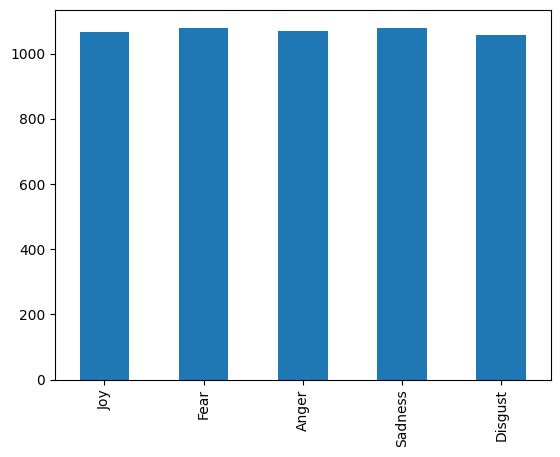

In [113]:
isear[["Joy","Fear","Anger","Sadness","Disgust"]].sum().plot.bar()

In [116]:
isear["Surprise"] = pd.NA
isear.to_csv("isear", index=False)